<h1>Первое задание<h1>

<div style="font-size:1.2em">
<ol>
    <li><input type="checkbox" checked> Посчитать корреляции только для цены</li>
    <li><input type="checkbox" checked> Посмотреть 2 года, 1 год</li>
    <li><input type="checkbox" checked> Построить moving 1 month correlation для всего года или даже двух</li>
    <li><input type="checkbox" checked> Проверить, меняется ли эта корреляция со временем</li>

</ol>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Get List of Top 11 Cryptos by Market Cap from coinmarketcap.com</h2>

In [2]:
from coinMarketCap import getTopHistory
dfs = getTopHistory(limit=11, days=90)

#print market cap top
pd.DataFrame([dfs[key].iloc[-1]['marketCap'] for key in dfs],
             index=list(dfs.keys()), 
             columns=['Market Cap for ' + str(dfs[next(iter(dfs))].iloc[-1].name.date())])

,Market Cap for 2021-11-08
BTC,1.274831e+12
ETH,5.690943e+11
BNB,1.091405e+11
ADA,7.071047e+10
USDT,7.256745e+10
SOL,7.519846e+10
XRP,6.037647e+10
DOT,5.268583e+10
DOGE,3.728220e+10
USDC,3.434063e+10


<h2>Calculate Pearson and Spearman Correlation by Price for 90 Days</h2>

In [3]:
closePrice_df = pd.concat([dfs[key]['close'] for key in dfs],axis=1, keys=list(dfs.keys()))
closePrice_df

,BTC,ETH,BNB,ADA,USDT,SOL,XRP,DOT,DOGE,USDC,SHIB
timestamp,,,,,,,,,,,
2021-08-12,44428.288467,3043.414340,385.818979,1.823878,1.000542,41.099363,0.964549,20.754807,0.263921,1.000092,0.000008
2021-08-13,47793.321179,3322.211756,410.944893,2.136079,1.000260,44.894501,1.089960,22.714149,0.286808,0.999514,0.000008
2021-08-14,47096.945662,3265.443357,409.034499,2.191687,1.000586,44.112852,1.280412,22.861027,0.293113,0.999954,0.000008
2021-08-15,47047.004542,3310.504171,414.595035,2.169153,1.000643,53.745160,1.288160,23.174016,0.341441,0.999849,0.000009
2021-08-16,46004.484079,3156.509427,417.470857,2.079417,1.000438,62.432463,1.190993,24.535857,0.320715,1.000102,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04,61452.230587,4537.324081,559.737291,1.984882,1.000857,247.387778,1.202003,53.881732,0.263280,1.000206,0.000049
2021-11-05,61125.674269,4486.243405,608.648048,1.986206,1.001553,236.474334,1.161533,51.894674,0.261465,1.000562,0.000062
2021-11-06,61527.481793,4521.581083,636.113951,2.006609,1.001454,258.934312,1.152454,52.009216,0.261898,1.000345,0.000059


[Text(0.5, 1.0, 'Spearman correlation by close Price for 90 days')]

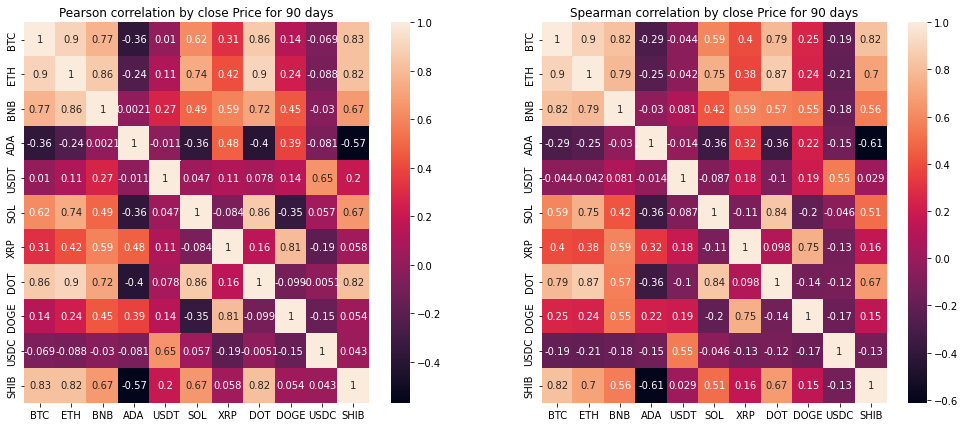

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(17,7))

pearson_corr = closePrice_df.corr(method='pearson')
sns.heatmap(pearson_corr,ax=ax1, annot=True).set(title="Pearson correlation by close Price for 90 days")

spearman_corr = closePrice_df.corr(method='spearman')
sns.heatmap(spearman_corr,ax=ax2, annot=True).set(title="Spearman correlation by close Price for 90 days")

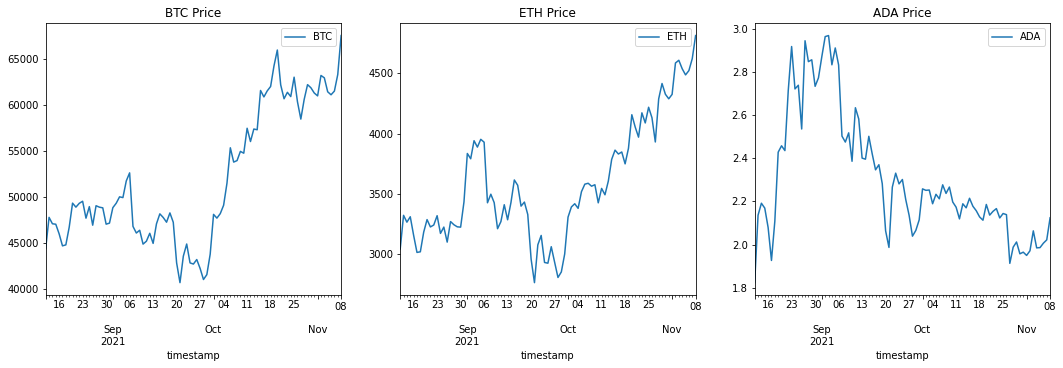

In [5]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(18,5))
for i, crypto in enumerate(['BTC', 'ETH', 'ADA']):
    closePrice_df.plot(ax=axes[i], y=crypto).set(title=crypto+" Price")

<h1>Calc correlation for 1 Year<h1>

In [6]:
dfsy = getTopHistory(limit=11, days=365)

In [7]:
closePrice_dfy = pd.concat([dfsy[key]['close'] for key in dfsy],axis=1, keys=list(dfsy.keys()))
closePrice_dfy

,BTC,ETH,BNB,ADA,USDT,SOL,XRP,DOT,DOGE,USDC,SHIB
timestamp,,,,,,,,,,,
2020-11-10,15290.902681,449.679621,28.193342,0.105805,1.001127,2.247987,0.253911,4.415016,0.002753,1.000325,0.000000
2020-11-11,15701.339732,462.960528,27.956178,0.105965,1.000985,2.002124,0.256259,4.457202,0.002769,1.000150,0.000000
2020-11-12,16276.343949,461.005271,27.614807,0.104525,1.000509,1.899138,0.254903,4.399240,0.002779,0.999207,0.000000
2020-11-13,16317.808190,474.626421,28.182172,0.106391,1.000345,2.020792,0.265190,4.540120,0.002821,1.000012,0.000000
2020-11-14,16068.138707,460.149837,27.936201,0.104202,1.000288,1.917016,0.268342,4.465622,0.002773,1.000224,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04,61452.230587,4537.324081,559.737291,1.984882,1.000857,247.387778,1.202003,53.881732,0.263280,1.000206,0.000049
2021-11-05,61125.674269,4486.243405,608.648048,1.986206,1.001553,236.474334,1.161533,51.894674,0.261465,1.000562,0.000062
2021-11-06,61527.481793,4521.581083,636.113951,2.006609,1.001454,258.934312,1.152454,52.009216,0.261898,1.000345,0.000059


[Text(0.5, 1.0, 'Spearman correlation by close Price for 1 Year')]

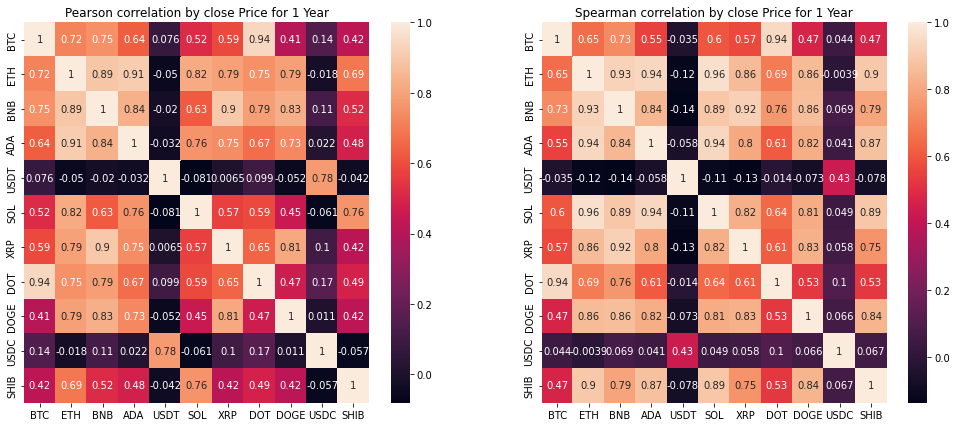

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(17,7))

pearson_corr = closePrice_dfy.corr(method='pearson')
sns.heatmap(pearson_corr,ax=ax1, annot=True).set(title="Pearson correlation by close Price for 1 Year")

spearman_corr = closePrice_dfy.corr(method='spearman')
sns.heatmap(spearman_corr,ax=ax2, annot=True).set(title="Spearman correlation by close Price for 1 Year")

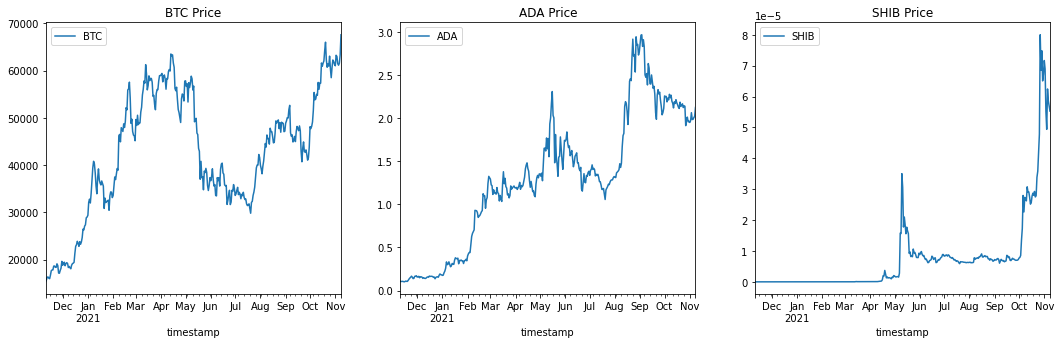

In [9]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(18,5))
for i, crypto in enumerate(['BTC', 'ADA', 'SHIB']):
    closePrice_dfy.plot(ax=axes[i], y=crypto).set(title=crypto+" Price")

<h2>Calc correlation over the year with a window of 30 days</h2>

In [10]:
year_corr = closePrice_dfy.rolling(30).corr()

<h2>Plot correlations</h2>

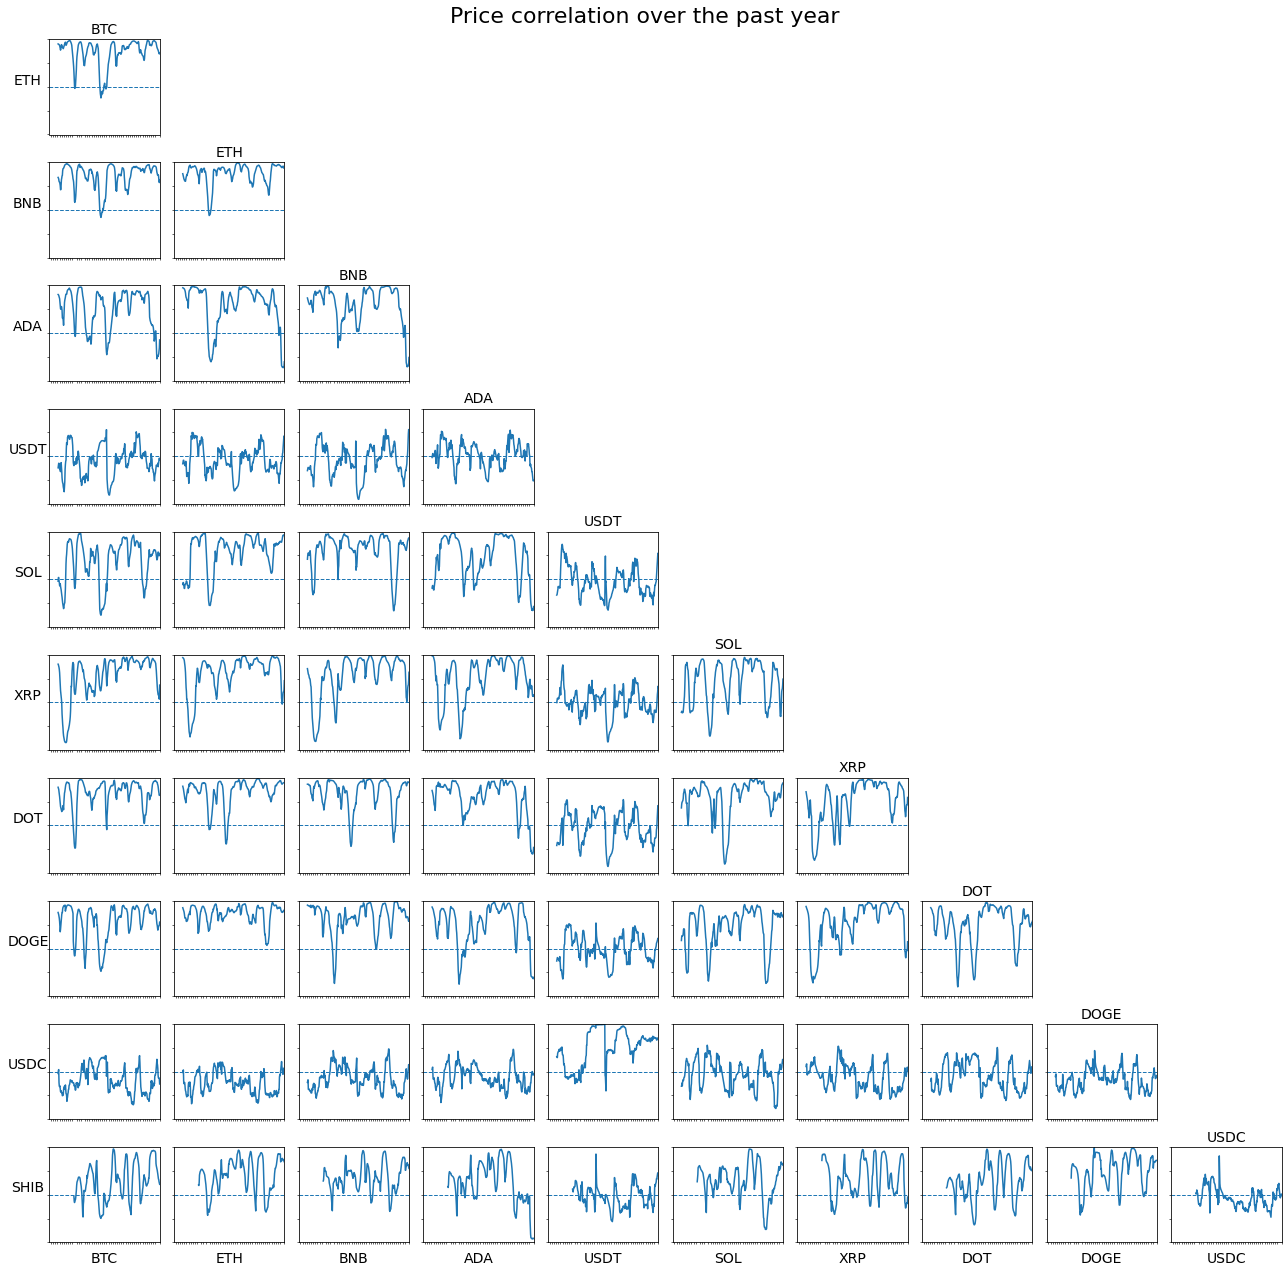

In [11]:
fig, axes = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(18,18))
fig.patch.set_facecolor('xkcd:white')
for i, key1 in enumerate(year_corr):
    if i==0 : continue
    for j, key2 in enumerate(year_corr):
        if j == len(year_corr.columns)-1 : continue
        
        ax = axes[i-1][j]
        
        if j < i: 
            year_corr.unstack()[key1,key2].plot(ax=ax)
            ax.axhline(y=0, ls='--', lw=1)
            if i == j+1 : ax.set_title(key2, fontsize=14)
        else:
            ax.axis('off')
            # ax.set_title(key1, fontsize=14)
            
        ax.set_ylim((-1,1))
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        
        if j == 0 : ax.set_ylabel(key1, rotation=0, fontsize=14, labelpad=16)
        if i == len(year_corr.columns)-1 : ax.set_xlabel(key2,fontsize=14)

fig.suptitle('Price correlation over the past year', fontsize=22)
fig.tight_layout()

<h1>Calc correlation for 2 Years<h1>

In [12]:
dfs2y = getTopHistory(limit=11, days=730)

In [13]:
dfs2y['SHIB']

,open,high,low,close,volume,marketCap
timestamp,,,,,,
2020-08-01,1.334650e-09,3.276510e-09,4.320100e-10,1.005570e-09,1.604789e+06,0.000000e+00
2020-08-02,1.008680e-09,1.073300e-09,3.564200e-10,5.099300e-10,1.930975e+05,0.000000e+00
2020-08-03,4.994600e-10,5.145200e-10,1.427500e-10,1.452000e-10,1.292252e+05,0.000000e+00
2020-08-04,1.452000e-10,2.029100e-10,1.381400e-10,1.616500e-10,1.971714e+04,0.000000e+00
2020-08-05,1.614700e-10,3.301200e-10,1.466300e-10,3.093900e-10,2.686884e+04,0.000000e+00
...,...,...,...,...,...,...
2021-11-04,5.510119e-05,6.092063e-05,4.339584e-05,4.937296e-05,1.148666e+10,2.711047e+10
2021-11-05,4.943737e-05,6.540593e-05,4.551115e-05,6.245206e-05,1.240121e+10,3.429214e+10
2021-11-06,6.266005e-05,6.312612e-05,5.514371e-05,5.855837e-05,6.445478e+09,3.215414e+10


In [14]:
closePrice_df2y = pd.concat([dfs2y[key]['close'] for key in dfs2y],axis=1, keys=list(dfs2y.keys()))
closePrice_df2y

,BTC,ETH,BNB,ADA,USDT,SOL,XRP,DOT,DOGE,USDC,SHIB
timestamp,,,,,,,,,,,
2019-11-11,8757.788542,185.489646,20.133140,0.043194,1.002438,NaN,0.275086,NaN,0.002715,1.004065,NaN
2019-11-12,8815.662539,186.843412,20.857446,0.043767,1.001398,NaN,0.272418,NaN,0.002725,1.002707,NaN
2019-11-13,8808.262582,188.258745,21.250432,0.043492,1.003175,NaN,0.273036,NaN,0.002698,1.004377,NaN
2019-11-14,8708.095095,185.999636,21.264699,0.043119,1.005582,NaN,0.270391,NaN,0.002680,1.006939,NaN
2019-11-15,8491.992012,180.521181,20.316226,0.043974,1.001369,NaN,0.261654,NaN,0.002657,1.002590,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04,61452.230587,4537.324081,559.737291,1.984882,1.000857,247.387778,1.202003,53.881732,0.263280,1.000206,0.000049
2021-11-05,61125.674269,4486.243405,608.648048,1.986206,1.001553,236.474334,1.161533,51.894674,0.261465,1.000562,0.000062
2021-11-06,61527.481793,4521.581083,636.113951,2.006609,1.001454,258.934312,1.152454,52.009216,0.261898,1.000345,0.000059


[Text(0.5, 1.0, 'Spearman correlation by close Price for 2 Years')]

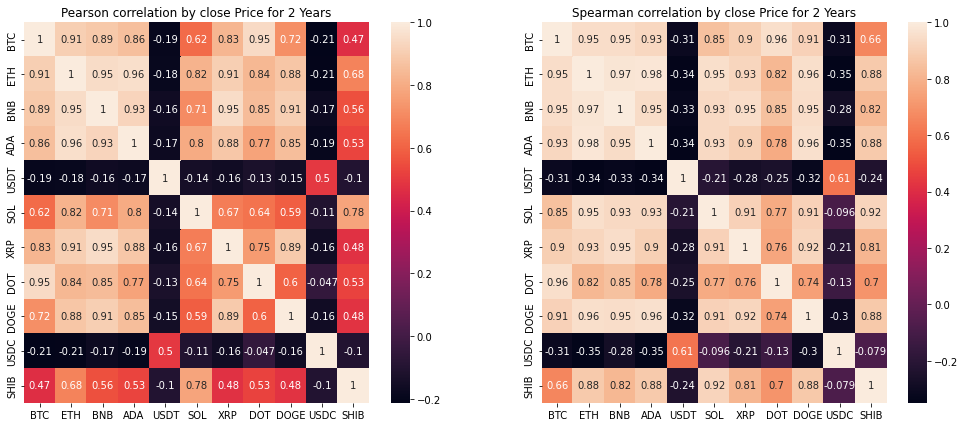

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(17,7))

pearson_corr = closePrice_df2y.corr(method='pearson')
sns.heatmap(pearson_corr,ax=ax1, annot=True).set(title="Pearson correlation by close Price for 2 Years")

spearman_corr = closePrice_df2y.corr(method='spearman')
sns.heatmap(spearman_corr,ax=ax2, annot=True).set(title="Spearman correlation by close Price for 2 Years")

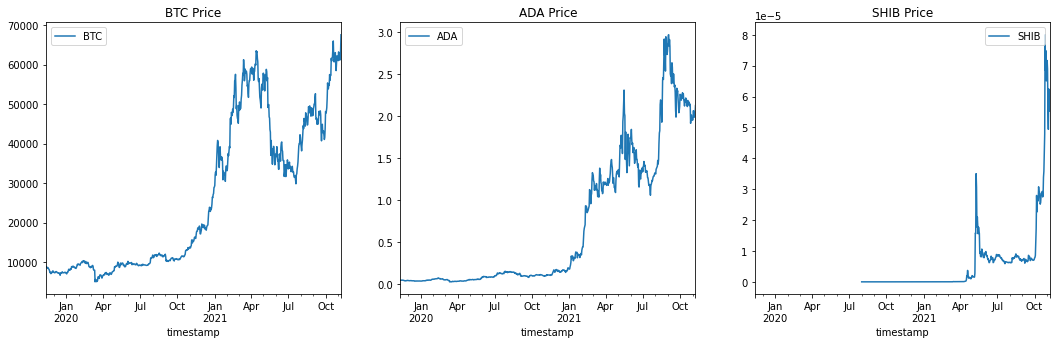

In [16]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(18,5))
for i, crypto in enumerate(['BTC', 'ADA', 'SHIB']):
    closePrice_df2y.plot(ax=axes[i], y=crypto).set(title=crypto+" Price")

<h2>Calc correlation over two years with a window of 30 days</h2>

In [17]:
year_2_corr = closePrice_df2y.rolling(30).corr()

<h2>Plot correlations</h2>

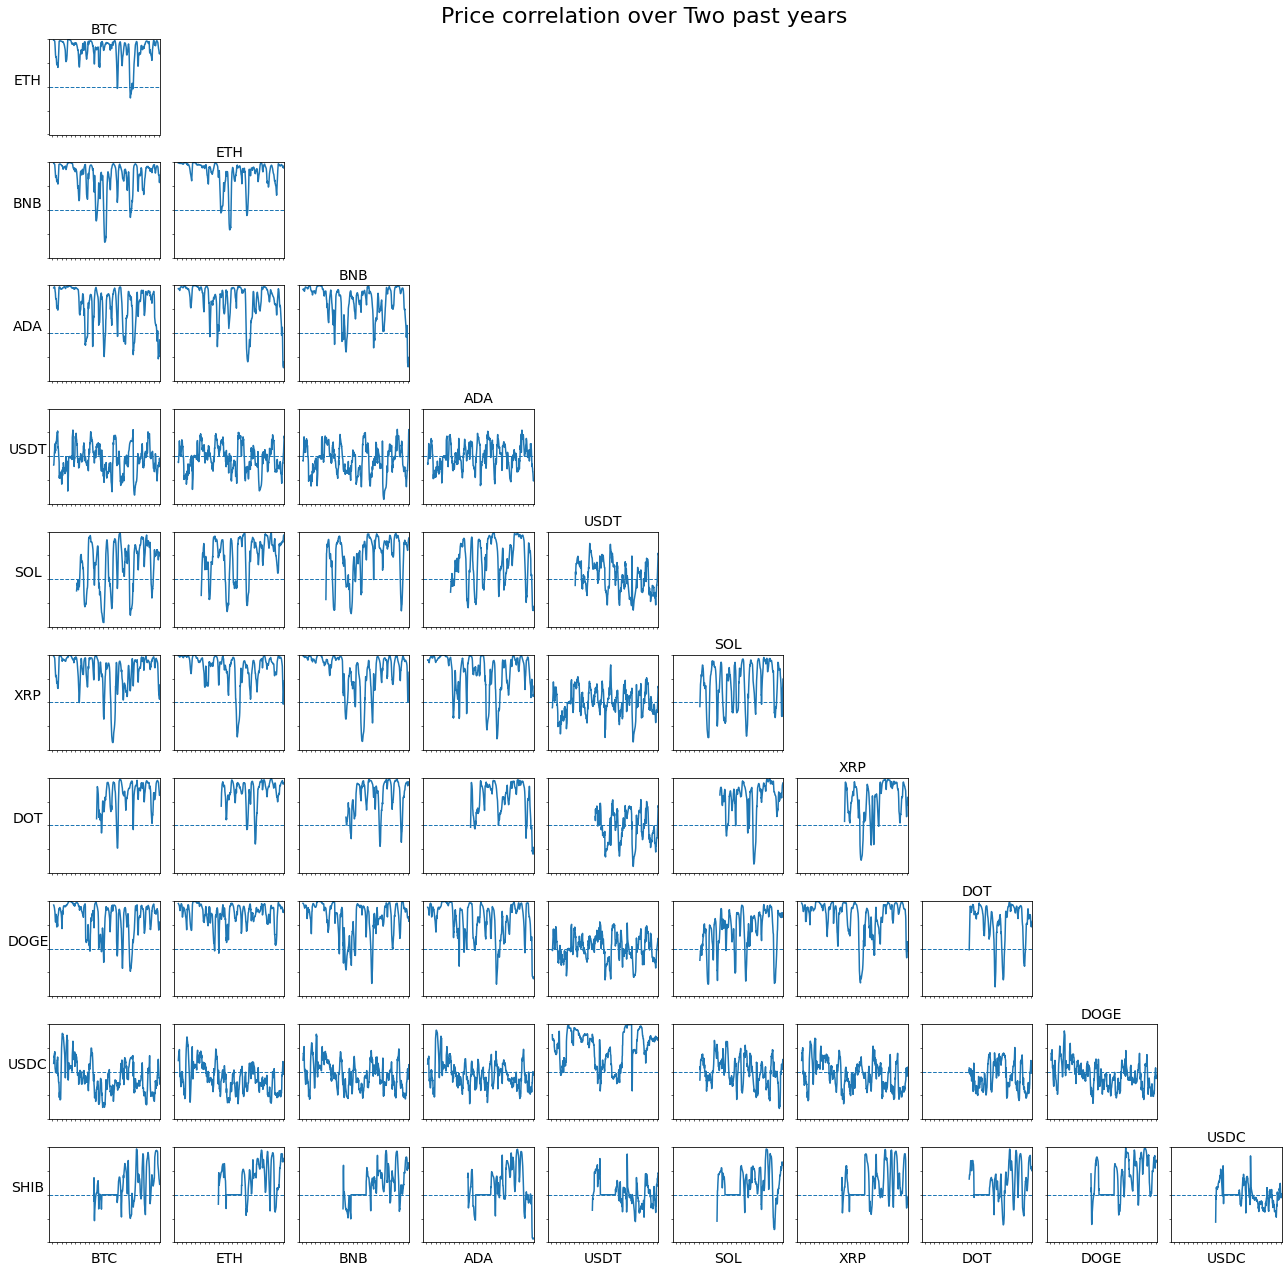

In [18]:
fig, axes = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(18,18))
fig.patch.set_facecolor('xkcd:white')
for i, key1 in enumerate(year_2_corr):
    if i==0 : continue
    for j, key2 in enumerate(year_2_corr):
        if j == len(year_2_corr.columns)-1 : continue
        
        ax = axes[i-1][j]
        
        if j < i: 
            year_2_corr.unstack()[key1,key2].plot(ax=ax)
            ax.axhline(y=0, ls='--', lw=1)
            if i == j+1 : ax.set_title(key2, fontsize=14)
        else:
            ax.axis('off')
            # ax.set_title(key1, fontsize=14)
            
        ax.set_ylim((-1,1))
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        
        if j == 0 : ax.set_ylabel(key1, rotation=0, fontsize=14, labelpad=16)
        if i == len(year_2_corr.columns)-1 : ax.set_xlabel(key2,fontsize=14)

fig.suptitle('Price correlation over Two past years', fontsize=22)
fig.tight_layout()